Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [9]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)
enrollments = read_csv('enrollments.csv')


In [10]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')


In [11]:
print len(daily_engagement)
print len(project_submissions)

print enrollments[0]
print
print daily_engagement[0]
print
print project_submissions[0]

136240
3642
{u'status': u'canceled', u'is_udacity': u'True', u'is_canceled': u'True', u'join_date': u'2014-11-10', u'account_key': u'448', u'cancel_date': u'2015-01-14', u'days_to_cancel': u'65'}

{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'}

{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


## Fixing Data Types

In [12]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [13]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [14]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [15]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

### For each of these three tables, find the number of rows in the table and
### the number of unique students in the table. To find the number of unique
### students, you might want to create a set of the account keys in each table.

def createAccountSet(listOfDict, accountKeyName='account_key'):
    accountSet = set()
    for entry in listOfDict:
        accountSet.add(entry[accountKeyName])
    return accountSet

enrollment_num_rows = len(enrollments)             
enrollment_num_unique_students = len(createAccountSet(enrollments))

engagement_num_rows = len(daily_engagement)           
engagement_num_unique_students = len(createAccountSet(daily_engagement, 'acct'))

submission_num_rows = len(project_submissions)             
submission_num_unique_students = len(createAccountSet(project_submissions))

print enrollment_num_rows
print engagement_num_rows
print submission_num_rows
print enrollment_num_unique_students
print engagement_num_unique_students
print submission_num_unique_students

1640
136240
3642
1302
1237
743


In [16]:
from prettytable import PrettyTable

def showTableFromDict(dict): 
    table = PrettyTable(['key','value'])
    for key,val in dict.items():
        table.add_row([key, str(val)])
    print table

showTableFromDict(enrollments[0])
showTableFromDict(daily_engagement[213])
showTableFromDict(project_submissions[0])

+----------------+---------------------+
|      key       |        value        |
+----------------+---------------------+
|     status     |       canceled      |
|   is_udacity   |         True        |
|  is_canceled   |         True        |
|   join_date    | 2014-11-10 00:00:00 |
|  account_key   |         448         |
|  cancel_date   | 2015-01-14 00:00:00 |
| days_to_cancel |          65         |
+----------------+---------------------+
+-----------------------+---------------------+
|          key          |        value        |
+-----------------------+---------------------+
|   lessons_completed   |          0          |
|  num_courses_visited  |          0          |
| total_minutes_visited |         0.0         |
|   projects_completed  |          0          |
|          acct         |          0          |
|        utc_date       | 2015-08-11 00:00:00 |
+-----------------------+---------------------+
+------------------+---------------------+
|       key        |      

## Problems in the Data

In [17]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
for entry in daily_engagement:
    value = entry.pop('acct')
    entry['account_key'] = value
    
showTableFromDict(daily_engagement[0])

daily_engagement[0]['account_key']

+-----------------------+---------------------+
|          key          |        value        |
+-----------------------+---------------------+
|   lessons_completed   |          0          |
|  num_courses_visited  |          1          |
| total_minutes_visited |      11.6793745     |
|   projects_completed  |          0          |
|      account_key      |          0          |
|        utc_date       | 2015-01-09 00:00:00 |
+-----------------------+---------------------+


u'0'

## Missing Engagement Records

In [18]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
enrollment_unique_students = createAccountSet(enrollments)
engagement_unique_students = createAccountSet(daily_engagement)
for enroll_record in enrollment_unique_students:
    if False == (enroll_record in engagement_unique_students):
        missing = enroll_record
        break
        
print missing

1145


In [19]:
for enrolls in enrollments:
    if enrolls['account_key'] == missing:
        showTableFromDict(enrolls)
        break

+----------------+---------------------+
|      key       |        value        |
+----------------+---------------------+
|     status     |       canceled      |
|   is_udacity   |        False        |
|  is_canceled   |         True        |
|   join_date    | 2015-04-04 00:00:00 |
|  account_key   |         1145        |
|  cancel_date   | 2015-04-04 00:00:00 |
| days_to_cancel |          0          |
+----------------+---------------------+


- is_udacity is false. 
- join_date and cancel_date are exactly same.
- days to cancel is 0. 

## Checking for More Problem Records

In [20]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
missing = []
for enroll in enrollments:
    if False == (enroll['account_key'] in engagement_unique_students):
        if enroll['days_to_cancel'] != 0:
            missing.append(enroll)
len(missing)
        

3

In [21]:
for missing_enroll in missing:
    showTableFromDict(missing_enroll)

+----------------+---------------------+
|      key       |        value        |
+----------------+---------------------+
|     status     |       canceled      |
|   is_udacity   |         True        |
|  is_canceled   |         True        |
|   join_date    | 2015-01-10 00:00:00 |
|  account_key   |         1304        |
|  cancel_date   | 2015-03-10 00:00:00 |
| days_to_cancel |          59         |
+----------------+---------------------+
+----------------+---------------------+
|      key       |        value        |
+----------------+---------------------+
|     status     |       canceled      |
|   is_udacity   |         True        |
|  is_canceled   |         True        |
|   join_date    | 2015-03-10 00:00:00 |
|  account_key   |         1304        |
|  cancel_date   | 2015-06-17 00:00:00 |
| days_to_cancel |          99         |
+----------------+---------------------+
+----------------+---------------------+
|      key       |        value        |
+---------------

According to Udacity data scientist, if 'is_udacity' == True, it is a testing account. Do not use them!

## Tracking Down the Remaining Problems

In [22]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [23]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [24]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [73]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.
paid_students = {}
for student in non_udacity_enrollments:
    if student['days_to_cancel'] == None or student['days_to_cancel'] > 7:
        key = student['account_key']
        if key not in paid_students or paid_students[key] < student['join_date']:
            paid_students[student['account_key']] = student['join_date']

print len(paid_students)
print type(paid_students)
print '1200' in paid_students
showTableFromDict(paid_students)

995
<type 'dict'>
True
+------+---------------------+
| key  |        value        |
+------+---------------------+
| 1200 | 2015-03-04 00:00:00 |
| 1175 | 2015-04-02 00:00:00 |
| 1269 | 2015-08-21 00:00:00 |
| 669  | 2015-05-12 00:00:00 |
| 1257 | 2015-07-09 00:00:00 |
| 344  | 2015-01-11 00:00:00 |
| 345  | 2015-01-07 00:00:00 |
| 346  | 2014-12-08 00:00:00 |
| 347  | 2015-04-05 00:00:00 |
| 340  | 2015-04-01 00:00:00 |
| 341  | 2015-05-10 00:00:00 |
| 342  | 2014-12-05 00:00:00 |
| 343  | 2014-12-07 00:00:00 |
| 811  | 2015-05-06 00:00:00 |
| 812  | 2015-07-09 00:00:00 |
| 348  | 2015-03-05 00:00:00 |
| 349  | 2015-04-03 00:00:00 |
| 816  | 2015-08-20 00:00:00 |
| 918  | 2015-04-06 00:00:00 |
| 1149 | 2015-04-01 00:00:00 |
| 719  | 2014-11-17 00:00:00 |
| 718  | 2015-05-08 00:00:00 |
| 715  | 2015-05-12 00:00:00 |
| 426  | 2015-05-07 00:00:00 |
| 713  | 2015-05-12 00:00:00 |
| 712  | 2014-11-13 00:00:00 |
| 710  | 2015-02-03 00:00:00 |
| 661  | 2015-05-12 00:00:00 |
| 660  | 2014-12

## Getting Data from First Week

In [106]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [107]:
showTableFromDict(non_udacity_engagement[0])

+-----------------------+---------------------+
|          key          |        value        |
+-----------------------+---------------------+
|   lessons_completed   |          0          |
|  num_courses_visited  |          1          |
| total_minutes_visited |      11.6793745     |
|   projects_completed  |          0          |
|      account_key      |          0          |
|        utc_date       | 2015-01-09 00:00:00 |
+-----------------------+---------------------+


In [108]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.
def removeFreeTrial(data):
    new_data = []
    for dataPoint in data:
        if dataPoint['account_key'] in paid_students:
            new_data.append(dataPoint)
    return new_data

paid_engagement = removeFreeTrial(non_udacity_engagement)
print len(paid_engagement)
paid_engagement_in_first_week = []
for student_engagement in paid_engagement:
    student_key = student_engagement['account_key']
    join_date = paid_students[student_key]
    engage_record_date = student_engagement['utc_date']
    if within_one_week(join_date, engage_record_date):
        paid_engagement_in_first_week.append(student_engagement)
            
len(paid_engagement_in_first_week)    

134549


6919

## Exploring Student Engagement

In [109]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [110]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [111]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [115]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

maxTime = 0
for tm in total_minutes:
    if tm > maxTime:
        maxTime = tm

print maxTime

key = total_minutes_by_account.keys()[total_minutes_by_account.values().index(maxTime)]
print key
print len(engagement_by_account[key])
for entry in engagement_by_account[key]:    
    showTableFromDict(entry)
        

3564.7332645
163
7
+-----------------------+---------------------+
|          key          |        value        |
+-----------------------+---------------------+
|   lessons_completed   |          4          |
|  num_courses_visited  |          4          |
| total_minutes_visited |    850.519339666    |
|   projects_completed  |          0          |
|      account_key      |         163         |
|        utc_date       | 2015-07-09 00:00:00 |
+-----------------------+---------------------+
+-----------------------+---------------------+
|          key          |        value        |
+-----------------------+---------------------+
|   lessons_completed   |          6          |
|  num_courses_visited  |          6          |
| total_minutes_visited |    872.633923334    |
|   projects_completed  |          0          |
|      account_key      |         163         |
|        utc_date       | 2015-07-10 00:00:00 |
+-----------------------+---------------------+
+--------------------

## Lessons Completed in First Week

In [133]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

lcByAccount = {}
for entrylist in engagement_by_account.iteritems():    
    total = 0
    for entry in entrylist[1]:
        total += entry['lessons_completed']    
    lcByAccount[entrylist[0]] = total
    
print len(lcByAccount)

995


In [139]:
print 'mean: {0}'.format(np.mean(lcByAccount.values()))
print 'std: {0}'.format(np.std(lcByAccount.values()))
print 'min: {0}'.format(np.min(lcByAccount.values()))
print 'max: {0}'.format(np.max(lcByAccount.values()))

mean: 1.63618090452
std: 3.00256129983
min: 0
max: 36


## Number of Visits in First Week

In [ ]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

## Splitting out Passing Students

In [ ]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

passing_engagement =
non_passing_engagement =

## Comparing the Two Student Groups

In [ ]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

## Making Histograms

(array([ 3.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,  0.,  1.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

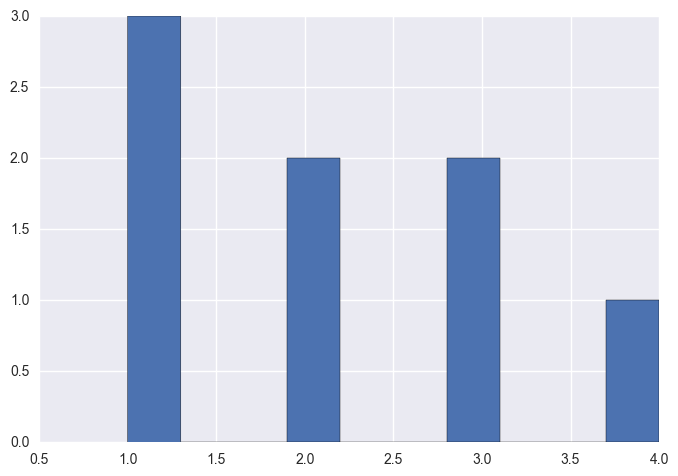

In [1]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

data = [1, 2, 1, 3, 3, 1, 4, 2]

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(data)

## Improving Plots and Sharing Findings

In [ ]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.